In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

## Zad 1 - Wczytanie danych

In [45]:
df = pd.read_csv('data/CO2 dataset.csv')

In [46]:
df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [47]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')


## Zad 2 - Wizualizacja

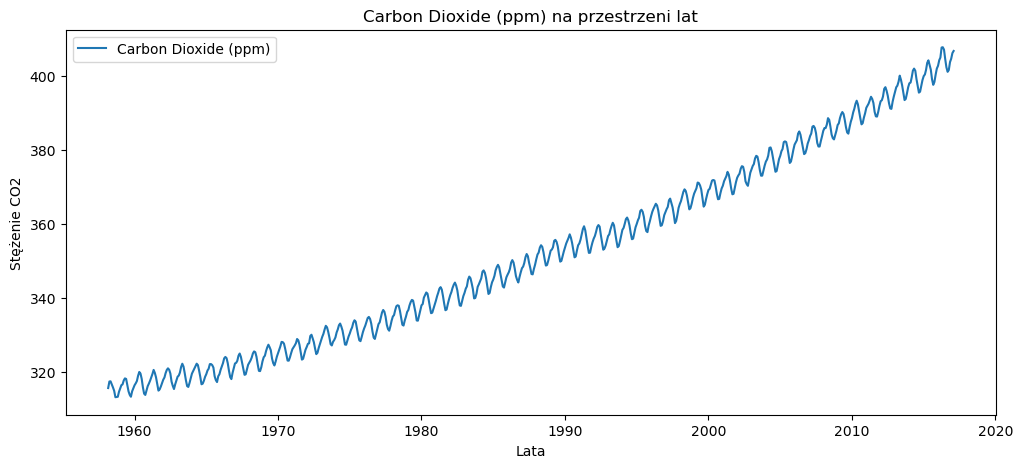

In [48]:
col = "Carbon Dioxide (ppm)"

fig, ax = plt.subplots(1,1,figsize=(12,5))
sns.lineplot(data=df, x='Date', y=col, label=col, errorbar=None)
ax.set_xlabel("Lata")
ax.set_ylabel("Stężenie CO2")
ax.set_title(f"{col} na przestrzeni lat")
plt.show()

## Zad 3 - Trend

In [49]:
rozmiar_okna = 12
df["trend"] = (df[col].rolling(window=rozmiar_okna).mean().rolling(window=2).mean().shift(-rozmiar_okna // 2))


## Zad 4 - Wizualizacja trendu z sygnałem wejściowym

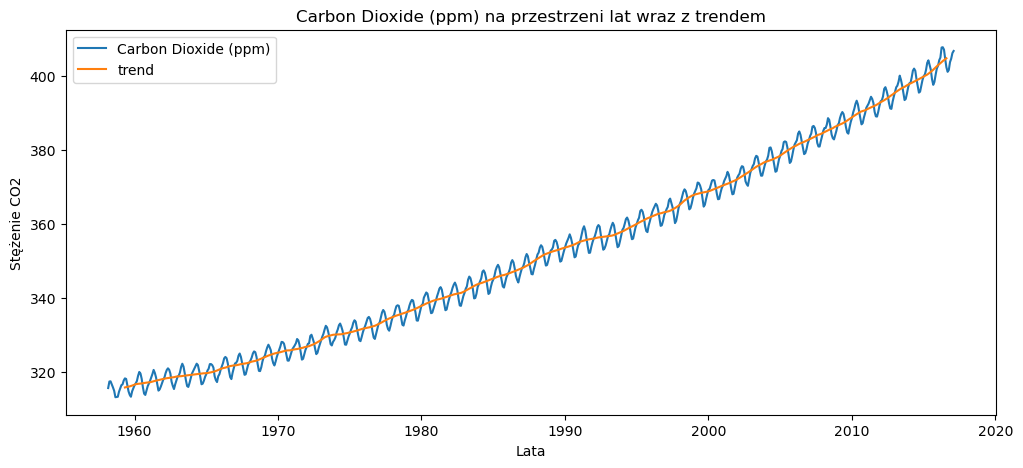

In [50]:
fig, ax = plt.subplots(1,1,figsize=(12,5))

sns.lineplot(data=df, x='Date', y=col, label=col, errorbar=None)
sns.lineplot(data=df, x='Date', y='trend', label='trend', errorbar=None)

ax.set_xlabel("Lata")
ax.set_ylabel("Stężenie CO2")
ax.set_title(f"{col} na przestrzeni lat wraz z trendem")
plt.show()

## Zad 5 - Wizualizacja trendu, sygnału wyjsciowego i ich różnicy

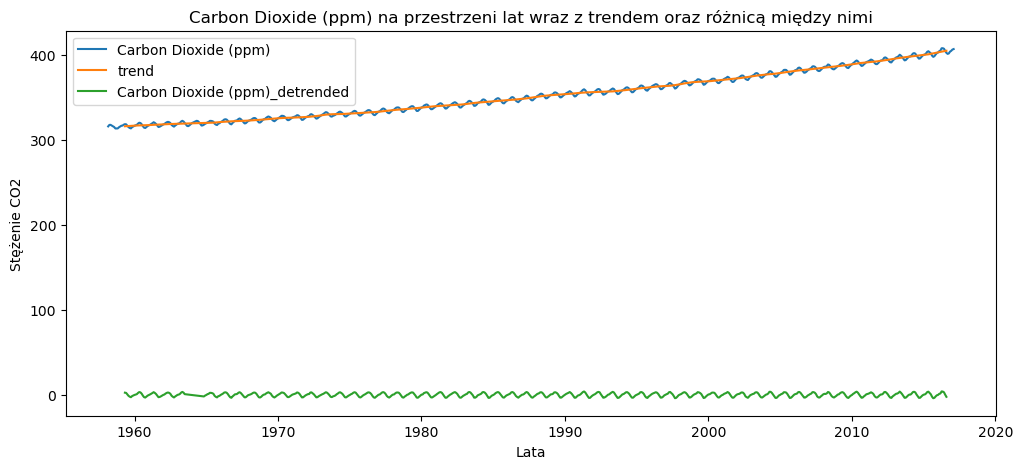

In [51]:
df[f'{col}_detrended'] = df[col] - df['trend']


fig, ax = plt.subplots(1,1,figsize=(12,5))

sns.lineplot(data=df, x='Date', y=col, label=col, errorbar=None)
sns.lineplot(data=df, x='Date', y='trend', label='trend', errorbar=None)
sns.lineplot(data=df, x='Date', y=f'{col}_detrended', label=f'{col}_detrended', errorbar=None)

ax.set_xlabel("Lata")
ax.set_ylabel("Stężenie CO2")
ax.set_title(f"{col} na przestrzeni lat wraz z trendem oraz różnicą między nimi")
plt.show()


Wykres przedstawiający sygnał wejściowy, wyliczony trend i różnicę między nimi sugeruje, że trend rzeczywiście wychwytuje długoterminowe zmiany w danych, podczas gdy różnica może ujawnić krótkoterminowe zmiany, które nie zostały uwzględnione w trendzie. Analiza różnicy między sygnałem wejściowym a trendem może pomóc w identyfikacji fluktuacji i cyklicznych wzorców, które mogą być istotne dla zrozumienia dynamiki danych.

## Zad 6 - Średnia szeregu czasowego po odfiltrowaniu trendu

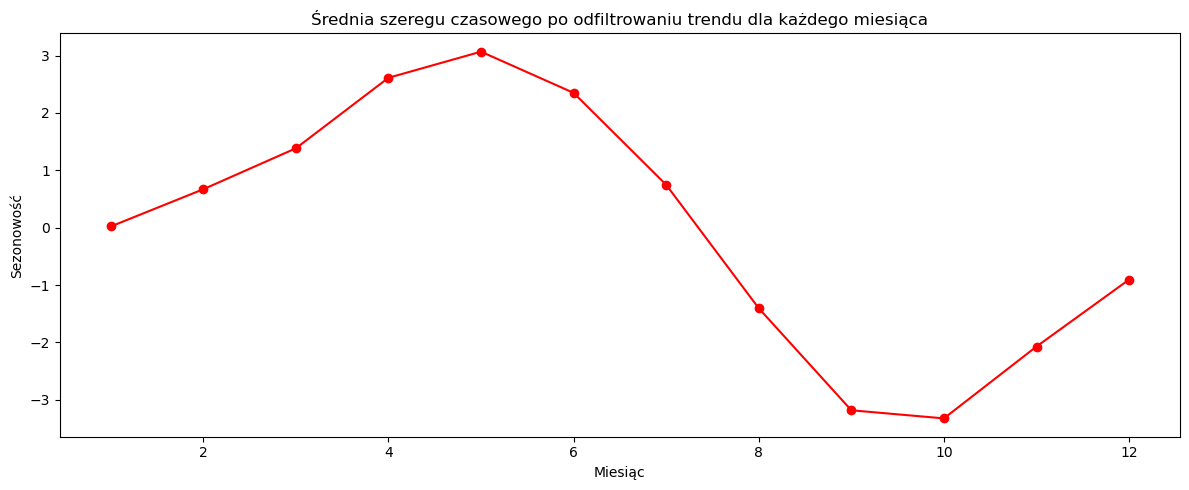

In [52]:
seasonality = df.groupby("Month").mean()[f"{col}_detrended"]
seasonality.name = "seasonality"
fig, ax = plt.subplots(figsize=[12, 5])
seasonality.plot(y="seasonality", ax=ax, marker="o", color="red")
ax.set_xlabel("Miesiąc")
ax.set_ylabel("Sezonowość")
ax.set_title("Średnia szeregu czasowego po odfiltrowaniu trendu dla każdego miesiąca")
plt.tight_layout()
plt.show()

## Zad 7 - Sezonowość i rezydua

In [53]:
df = df.merge(right=seasonality, left_on="Month", right_index=True)
df = df.sort_index()
df["residual"] = df[col] - df["trend"] - df["seasonality"]

## Zad 8 - Wizualizacja rezyduów

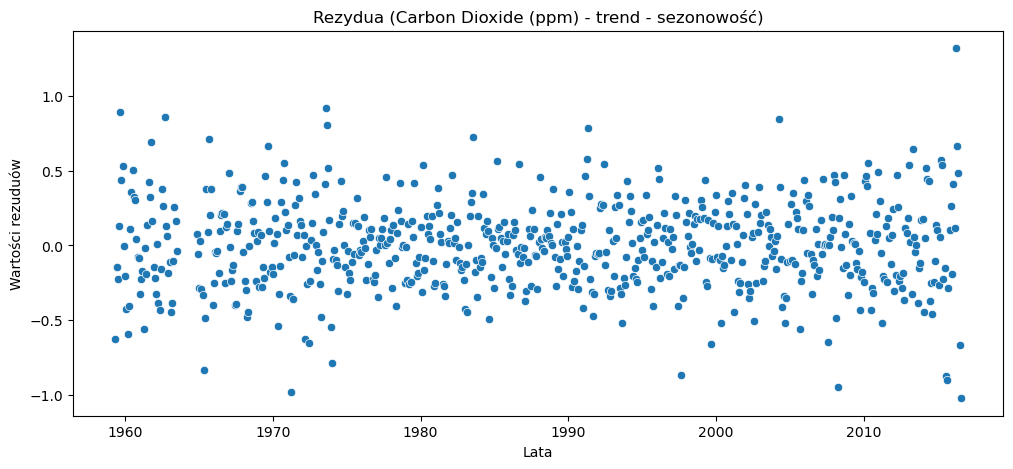

In [54]:
fig, ax = plt.subplots(1,1,figsize=(12,5))

sns.scatterplot(data=df, x='Date', y="residual")

ax.set_xlabel("Lata")
ax.set_ylabel("Wartości rezuduów")
ax.set_title(f"Rezydua ({col} - trend - sezonowość)")
plt.show()

## Zad 9 - Podsumowanie i interpretacja

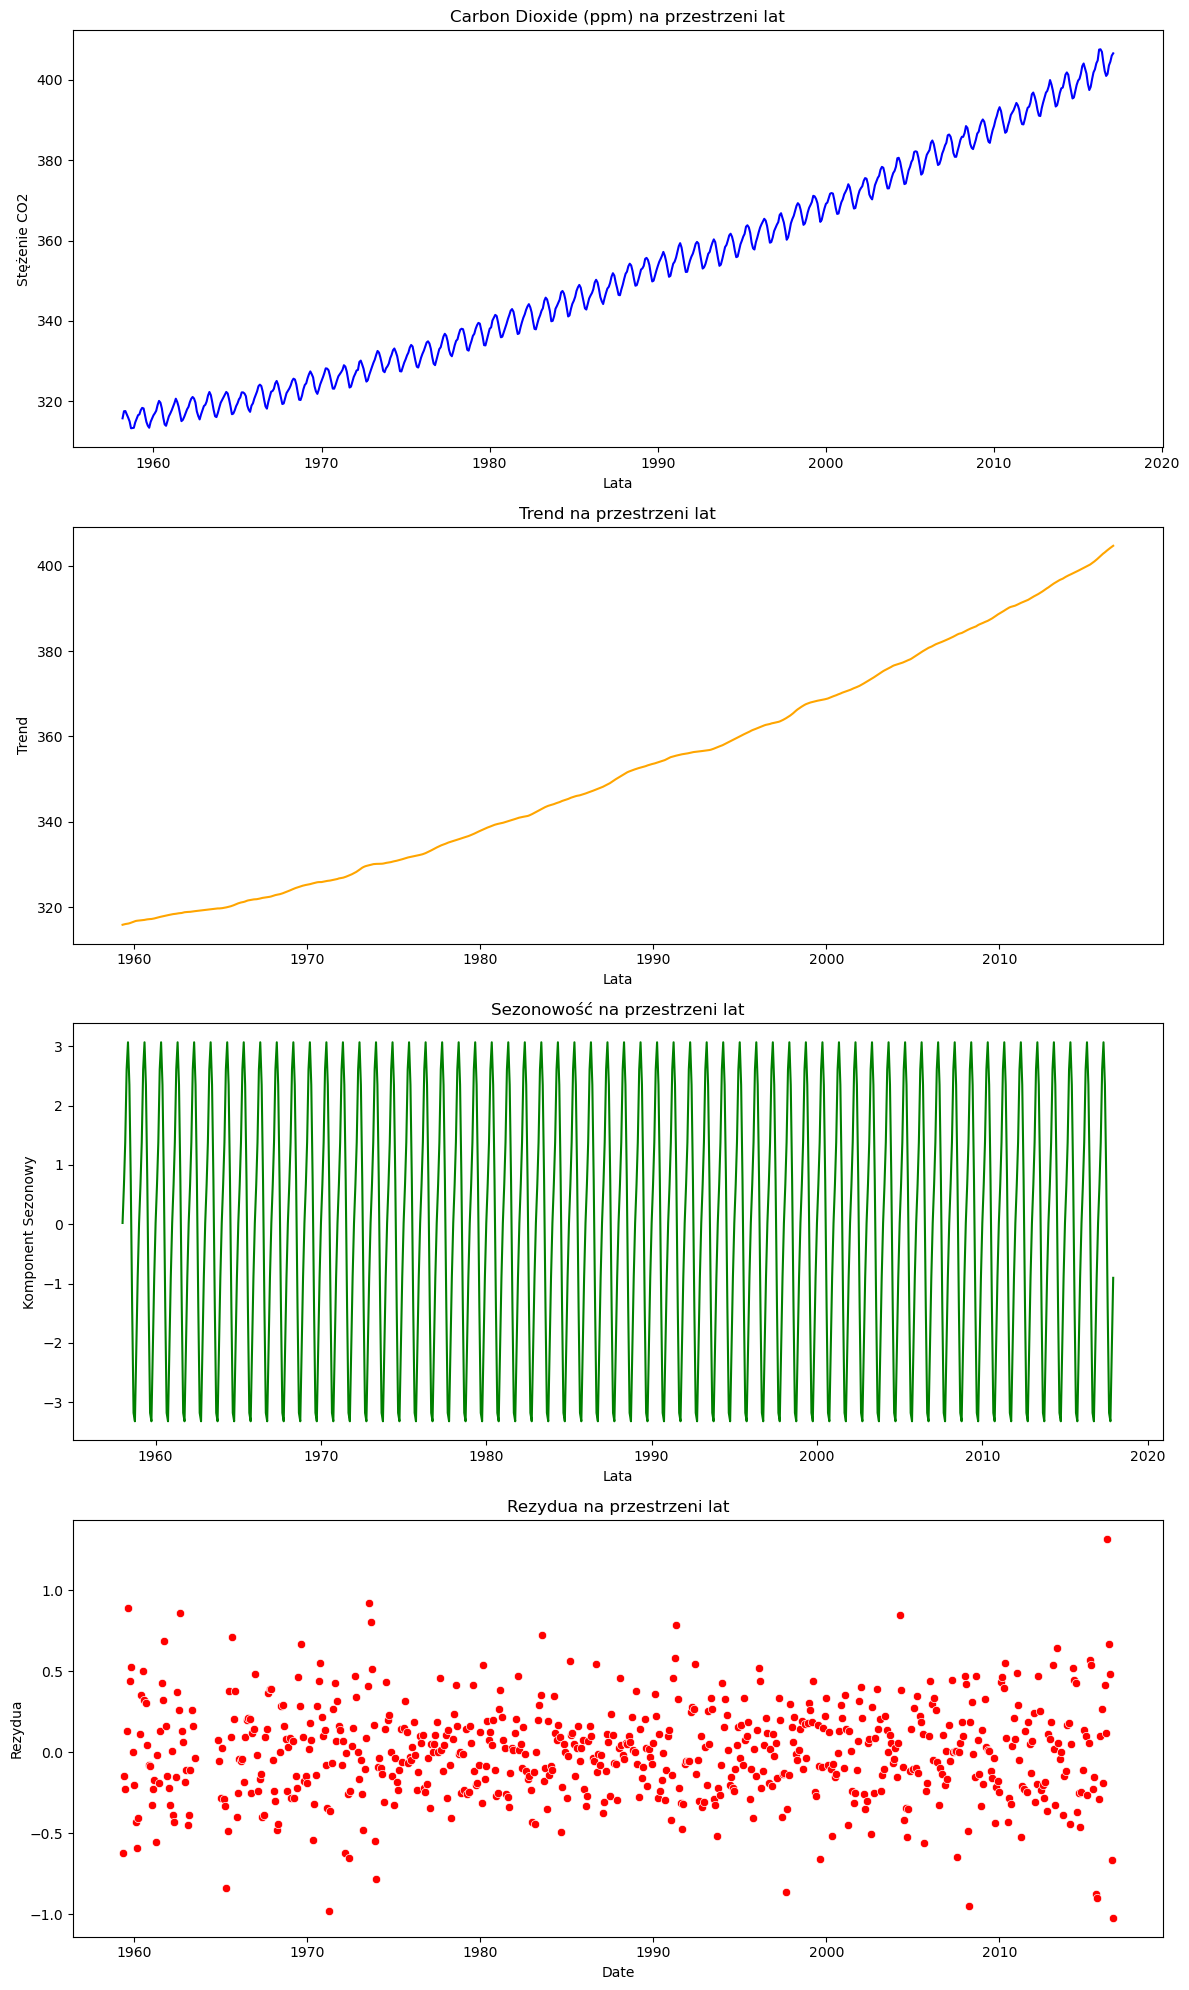

In [55]:
fig, ax = plt.subplots(4,1, figsize=[12, 20])

sns.lineplot(data=df, x='Date', y=col, errorbar=None, ax=ax[0], color='blue')
ax[0].set(ylabel="Stężenie CO2", title=f'{col} na przestrzeni lat')
sns.lineplot(data=df, x='Date', y='trend', errorbar=None, ax=ax[1] ,color='orange')
ax[1].set(ylabel="Trend", title="Trend na przestrzeni lat")
sns.lineplot(data=df, x='Date', y='seasonality', errorbar=None, ax=ax[2], color='green')
ax[2].set(ylabel="Komponent Sezonowy", title="Sezonowość na przestrzeni lat")
sns.scatterplot(data=df, x='Date', y='residual', ax=ax[3], color='red')
ax[3].set(ylabel="Rezydua", title="Rezydua na przestrzeni lat")

for i in range(3):
    ax[i].set_xlabel('Lata')

plt.tight_layout()
plt.show()

1. Sygnał wejściowy (niebieski) przedstawia obserwowane stężenie dwutlenku węgla w czasie.
2. Trend (pomarańczowy) pokazuje długoterminowe zmiany i tendencje w stężeniu dwutlenku węgla.
3. Komponent sezonowy (zielony) reprezentuje sezonowe fluktuacje w danych.
4. Rezydua (czerwone) są różnicą między sygnałem a trendem+sezonowością. Ujawniają ona krótkoterminowe zmiany, które nie zostały uwzględnione w trendzie ani sezonowości, co może być istotne dla identyfikacji nieregularności lub szumów w danych.